In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pprint
%matplotlib inline

In [2]:
pp = '/home/marco/PycharmProjects/ini_caltech101/'

In [144]:
import json
import matplotlib.ticker as mtick

fmt = '%3.f%%' # Format you want the ticks, e.g. '40%'
yticks = mtick.FormatStrFormatter(fmt)
                             
def plot(history_json, leg_locs=['upper right', 'lower right']):
    with open(history_json) as data_file:    
        data = json.load(data_file)
    
    fig, axs = plt.subplots(1,2, figsize=(20, 10))
    
    if 'val_class_acc' in data:
        print np.mean(data['val_class_acc'],axis=1)
    if 'test_class_acc' in data:
        print np.mean(data['test_class_acc'],axis=1)
    
    mean_loss = np.mean(data['loss'], axis=1)
    mean_val_loss = np.mean(data['val_loss'], axis=1)
    mean_acc = np.mean(data['acc'], axis=1)
    mean_val_acc = np.mean(data['val_acc'], axis=1)
    mean_val_class_acc = np.mean(data['val_acc'], axis=1)
    epochs = range(len(mean_loss))
    
    # plotting
    linewidth=2.0
    axs[0].plot(epochs, mean_loss, 'k--', label='Train loss', linewidth=linewidth)
    axs[0].plot(epochs, mean_val_loss, 'k:', label='Validation loss', linewidth=linewidth)
    
    axs[1].plot(epochs, mean_acc, 'k--', label='Train accuracy', linewidth=linewidth)
    axs[1].plot(epochs, mean_val_acc, 'k:', label='Validation accuracy', linewidth=linewidth)
    
    # Now add the legend with some customizations.
    for ax, leg_loc in zip([axs[0], axs[1]], leg_locs):
        ax.set_xlabel('Epoch', fontsize=20)
        ax.tick_params(labelsize=18)
        
        legend = ax.legend(loc=leg_loc)

        # The frame is matplotlib.patches.Rectangle instance surrounding the legend.
        frame = legend.get_frame()
        frame.set_facecolor('0.90')

        # Set the fontsize
        for label in legend.get_texts():
            label.set_fontsize(20)

        for label in legend.get_lines():
            label.set_linewidth(3)  # the legend line width
    
    axs[0].set_ylabel('Cross-Entropy Loss', fontsize=24)
    
    axs[1].set_ylabel('Accuracy', fontsize=24)
    axs[1].set_ylim(0, 1.0)
    vals = axs[1].get_yticks()
    axs[1].set_yticklabels(['{:3.0f}%'.format(x*100) for x in vals])
    
    return fig

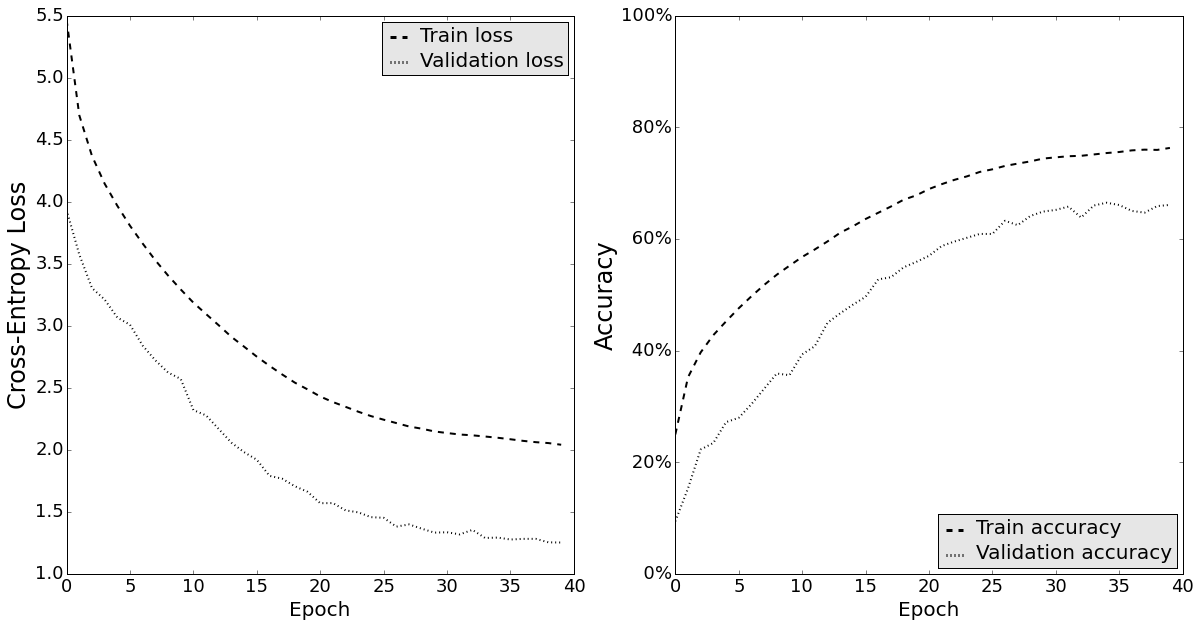

In [135]:
fig = plot(pp + 'results/2015-11-18_17.42.39_no-normalization_img-gen_history.json')
fig.savefig(pp+ 'results/test.png')

In [142]:
with open(pp + 'results/2015-12-22_21.50.35_testing_bn_triangluar_cv1_e20_history.json') as data_file:    
    data = json.load(data_file)
    print np.mean(data['val_class_acc'],axis=1)


[ 0.54444741  0.70373197  0.77544009  0.80512194  0.8152652   0.81664949
  0.8171345   0.81824522  0.81824689  0.82024562  0.81916192  0.81761305
  0.82014586  0.82078598  0.82164329  0.81902336  0.8227612   0.82128453
  0.82247162  0.82438951]


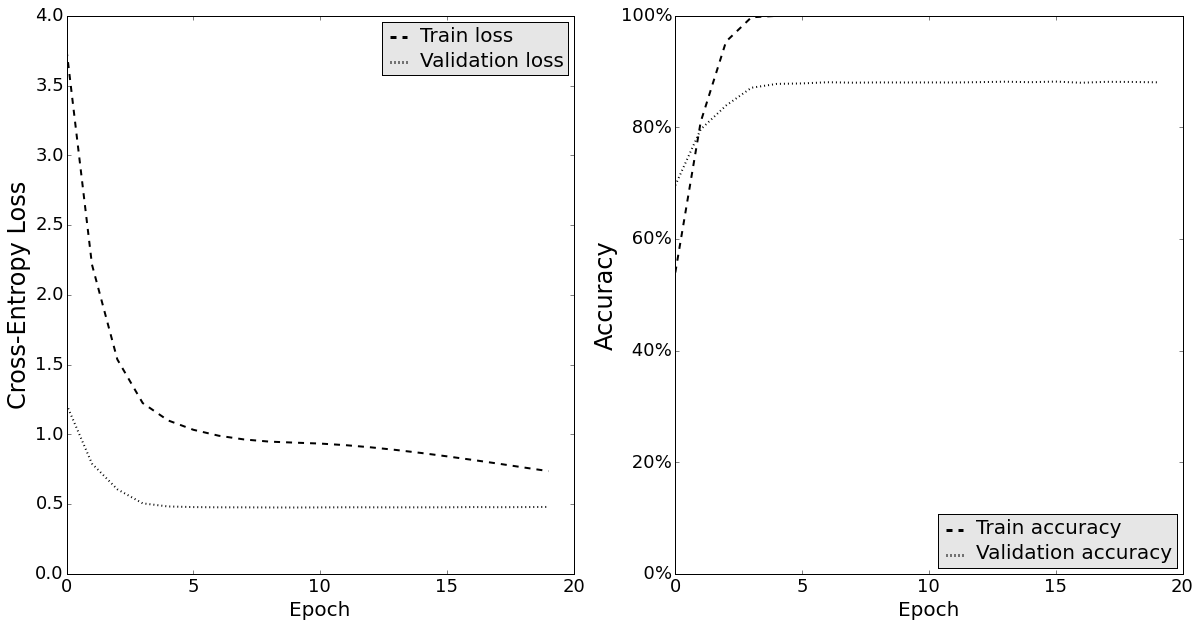

In [132]:
# batch normalization mode 1 modified, data normalization
# 20 epochs, batch size 64, 1200s per epoch
# triangular lr: lr=0.001, step_size=12000, max_lr=0.02
# 81378 train samples, 9104 validation samples, 10102 test samples -> train/test split loaded from disk
fig = plot(pp + 'results/2015-12-04_20.23.03_bn_triangular_e20_img-gen_history.json')
fig.savefig(pp+ 'results/test.png')

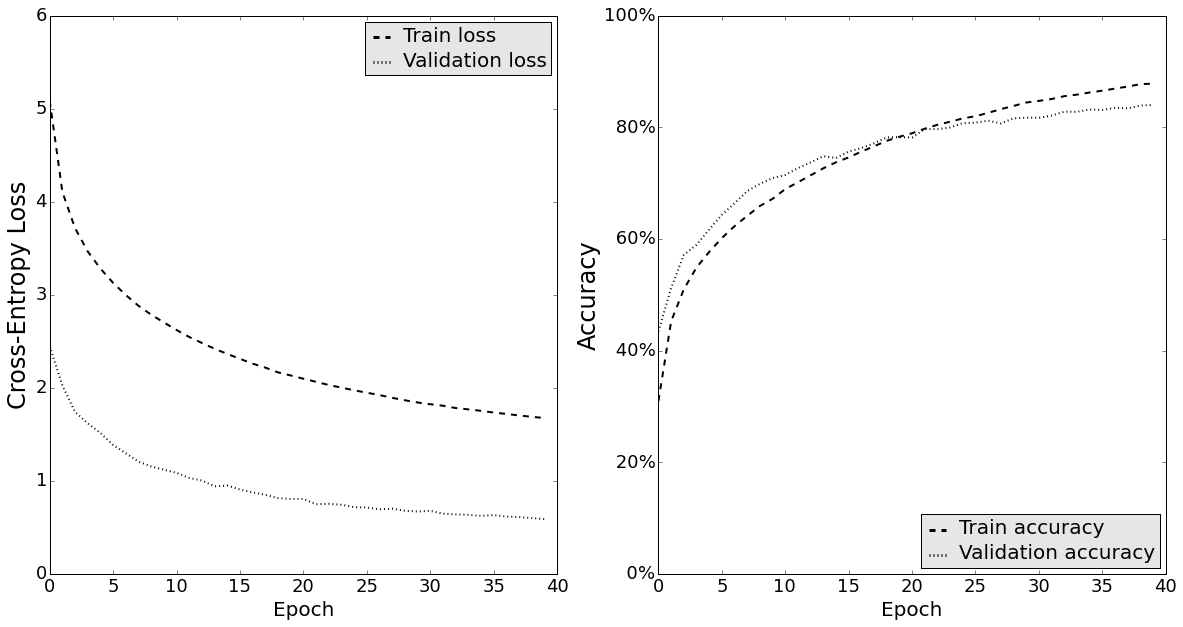

In [136]:
# no batch normalization, data normalization
# 40 epochs, batch size 64,  810s per epoch
# 81378 train samples, 9104 validation samples, 10102 test samples -> train/test split loaded from disk
# lr=0.005

fig = plot(pp + 'results/2015-12-13_19.06.00_no-bn_lr-0.005_e40_img-gen_history.json')

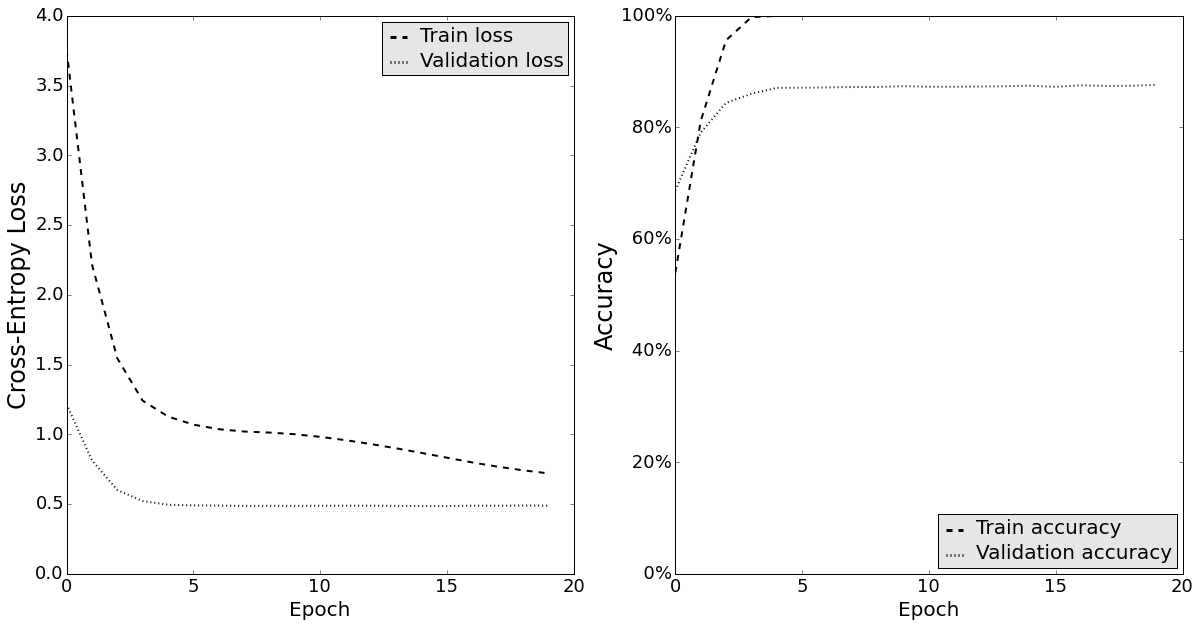

In [137]:
fig = plot(pp + 'results/2015-12-22_21.50.35_testing_bn_triangluar_cv1_e20_history.json')

[ 0.56979192  0.70888764  0.78471277  0.80489646  0.82075266  0.8224036
  0.82253439  0.82122018  0.82266237  0.82289847  0.82171857  0.82385364
  0.82199427  0.82433796  0.82309061  0.82717096  0.82442403  0.82524422
  0.82735662  0.82661765]
[ 0.82411904]


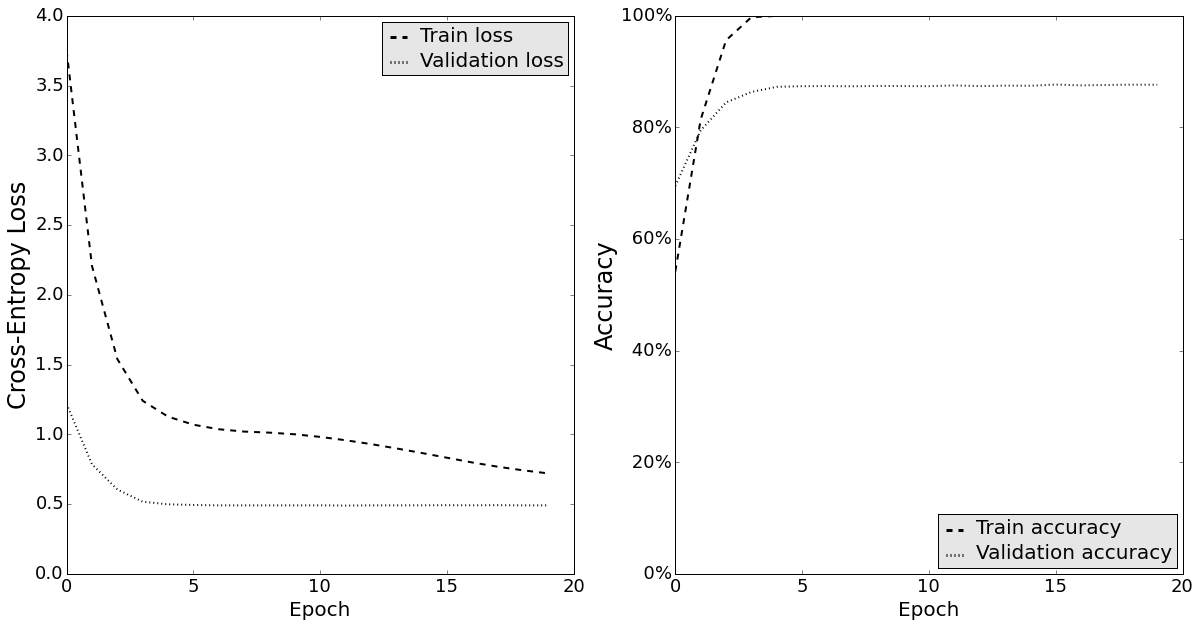

In [145]:
fig= plot(pp + 'results/2015-12-23_05.16.59_testing_class-weight-auto_bn_triangluar_cv1_e20_history.json')